#ANÁLISE DE CORRESPONDÊNCIA SIMPLES E MÚLTIPLA


A análise de correspondência é útel quando há a intenção de se trabalhar com variáveis que apresentam dados categóricos, como variáveis qualitativas, e se deseja investigar a associação (Relação de Interdependência) entre essas variáveis. Quando feita com duas variáveis é chamada de análise de correspondência simples, quando é mais de duas, é chamada de análise de correspondência múltipla. Segundo Greenacre (2008) a análise de correspondência consiste em métodos de representação de linhas e colunas de tabelas cruzadas de dados como coordenadas em um gráfico, chamado de mapa perceptual.


**Análise de correspondência Simples (ANACOR):** Consiste em uma técnica de análise bivariada na qual se estuda a associação entre variáveis categóricas, bem como sua intensidade de associação, através de uma tabela cruzada de dados. Tabela de Contingência (Cross-tabulation).
Dado um banco de dados com duas variáveis categóricas, em que a primeira apresenta I categorias, e a segunda, J categorias. É possível definir uma tabela de contingência $X_{o}$ que representa as frequências absolutas observadas. Sua representação é dada por:

$X_o=\left(\begin{matrix}n_{11}&n_{12}&n_{1J}\\n_{21}&n_{22}&n_{2J}\\n_{2I}&n_{I2}&n_{IJ}\\\end{matrix}\right)$

In [10]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import seaborn as sns
import matplotlib.pyplot as plt
import prince 

In [2]:
data= pd.read_csv('estudantes_adapta.csv')
display(data.describe())

,Education,Institution,Financial,Internet,Adaptivity
count,1205,1205,1205,1205,1205
unique,3,2,3,2,3
top,School,Non Government,Mid,Mobile Data,Moderate
freq,530,823,878,695,625


In [3]:
#criando crosstables
from itertools import combinations
crosstables={}
for i,j in list(combinations(data.columns, 2)):
  crosstables[i,j]=pd.crosstab(data[i], data[j])

In [4]:
#exibindo crosstables
for j in crosstables:
  display(crosstables[j])

Institution,Government,Non Government
Education,,
College,127,92
School,100,430
University,155,301


Financial,Mid,Poor,Rich
Education,,,
College,200,17,2
School,336,143,51
University,342,82,32


Internet,Mobile Data,Wifi
Education,,
College,99,120
School,395,135
University,201,255


Adaptivity,High,Low,Moderate
Education,,,
College,3,120,96
School,47,182,301
University,50,178,228


Financial,Mid,Poor,Rich
Institution,,,
Government,288,62,32
Non Government,590,180,53


Internet,Mobile Data,Wifi
Institution,,
Government,237,145
Non Government,458,365


Adaptivity,High,Low,Moderate
Institution,,,
Government,20,234,128
Non Government,80,246,497


Internet,Mobile Data,Wifi
Financial,,
Mid,473,405
Poor,199,43
Rich,23,62


Adaptivity,High,Low,Moderate
Financial,,,
Mid,36,341,501
Poor,22,129,91
Rich,42,10,33


Adaptivity,High,Low,Moderate
Internet,,,
Mobile Data,36,288,371
Wifi,64,192,254


Feito isso, é possível extrair as frequências absolutas esperadas, que é dado por $(\sum{\sum{c_J}*\sum{I_J}}/N)$. É possível obter uma matriz de resíduos subtraindo o observado do esperado, com base no somatório de todos os resíduos tem-se uma estatística $\chi^{2}$ que podde ser testada com (I - 1) X (J - 1) graus de liberdade.

- $H_0$: As duas variáveis categóricas se associam de forma aleatória.
- $H_1$: As duas variáveis categóricas se associam de forma não-aleatória.

A medida que o tamanho da amostra cresce (N) a estatística X² também cresce, podendo prejudicar a análise. Esse problema segundo Beh(2004) pode ser superado utilizando a **inércia principal total** expressa por: $I_T=\frac{\chi^{2}}{N}$

In [51]:
for j in crosstables:
  chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(crosstables[j])
  print(j, f'***  χ² = {chi2:.2f} and p-valor = {pvalor:.3f}')

('Education', 'Institution') ***  χ² = 111.33 and p-valor = 0.000
('Education', 'Financial') ***  χ² = 63.83 and p-valor = 0.000
('Education', 'Internet') ***  χ² = 110.15 and p-valor = 0.000
('Education', 'Adaptivity') ***  χ² = 38.69 and p-valor = 0.000
('Institution', 'Financial') ***  χ² = 6.01 and p-valor = 0.049
('Institution', 'Internet') ***  χ² = 4.11 and p-valor = 0.043
('Institution', 'Adaptivity') ***  χ² = 107.11 and p-valor = 0.000
('Financial', 'Internet') ***  χ² = 97.62 and p-valor = 0.000
('Financial', 'Adaptivity') ***  χ² = 236.86 and p-valor = 0.000
('Internet', 'Adaptivity') ***  χ² = 21.04 and p-valor = 0.000


Enquanto o teste $\chi^2$ permite avaliar se a distribuição das frequências das categorias de uma variável segundo as categorias da outra é aleatória ou se há um padrão de dependência entre as duas, a análise dos **resíduos padronizados ajustados**, segundo Batista, Escuder e Pereira (2004), revela os padrões característicos de cada  categoria de uma variável segundo o excesso ou a falta de ocorrências de sua combinação com cada categoria da outra variável.Vamos, então, introduzir seus conceitos.

Os **resíduos padronizados ajustados** são encontrados dividindo-se cada componente da matriz pela raiz quadrada da respectiva frequência absoluta esperada. $e_{padronizado}=\frac{n_{ij}-ne_{ij}}{\sqrt{ne_{ij}}}$. em que, $n_{ij}$ e $ne_{ij}$ se referem, respectivamente, às frequências absolutas observadas e às frequências absolutas esperadas.

A partir dos resíduos padronizados, podemos calcular os resíduos padronizados ajustados propostos por Haberman (1973), cuja expressão geral, para cada célula $ij$ $(i = 1, .. ., I e j = 1, ... ,})$,é dada por: $e_{padronizado ajustado ij}=\frac{e_{padronizado}}{\sqrt{(1-\frac{\sum{c_{j}}}{N})(1-\frac{\sum{J_{i}}}{N})}}$

Segundo Batista, Escuder e Pereira (2004), na abordagem de resíduos padronizados ajustados. Em geral adota-se o nível de significância de 5%, o que crresponde a um resíduo padronizado ajustado superior a 1,96. Logo, caso determinada célula apresente um resíduo padronizado ajustado com valor superior a 1,96. Pode-se caracterizar associação entre as duas categorias correspondentes.

In [6]:
r_std_ajst={}
for j in crosstables:
  n=np.matrix(crosstables[j], dtype = float)
  cont_sum_row = n.sum(axis=1)
  cont_sum_col = n.sum(axis=0)
  freq_abs_esperada = (np.multiply(cont_sum_row, cont_sum_col))/n.sum()
  freq_abs_esperada = np.around(freq_abs_esperada, decimals = 1)
  residuo = n - freq_abs_esperada
  residuo_std = residuo / np.sqrt(freq_abs_esperada)
  residuo_std = np.around(residuo_std, decimals = 1)
  residuo_std_ajst = np.divide(residuo_std,
                               np.sqrt(np.multiply((1-(cont_sum_col/n.sum())),(1-(cont_sum_row/n.sum())))))
  residuo_std_ajst = np.around(residuo_std_ajst, decimals = 2)
  r_std_ajst[j] = pd.DataFrame(residuo_std_ajst, columns = crosstables[j].columns,index=crosstables[j].index)

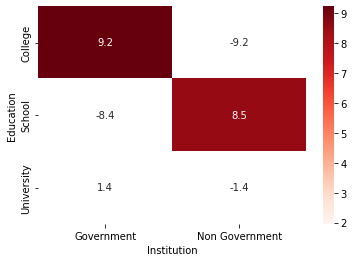

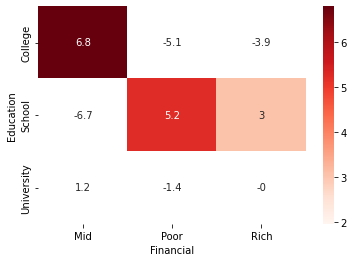

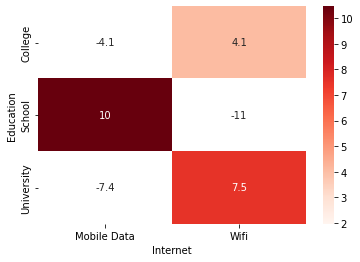

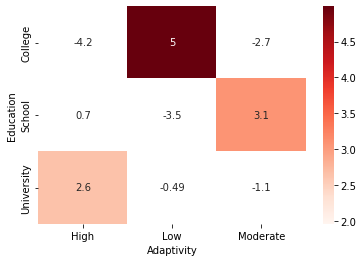

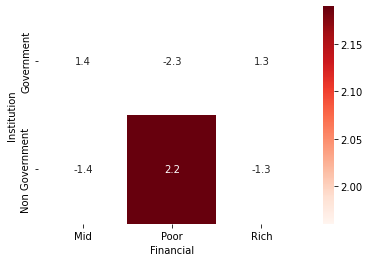

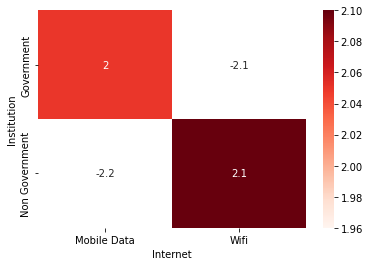

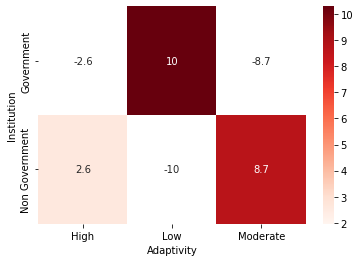

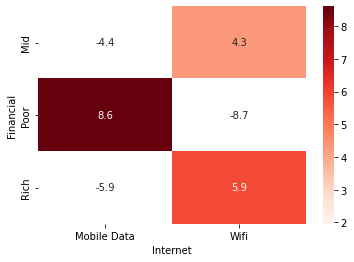

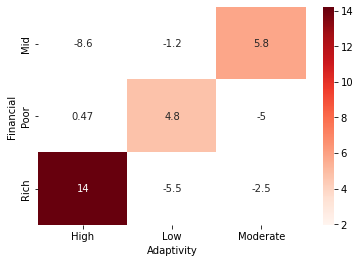

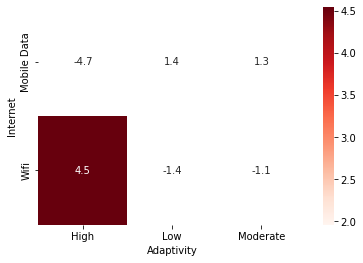

In [7]:
cmap = plt.get_cmap('Reds')
cmap.set_under('white')
for j in crosstables:
  plt.figure()
  plt.tight_layout()
  sns.heatmap(r_std_ajst[j], annot=True, vmin= 1.96,cmap=cmap)

O método de decomposição de autovalores é conhecido por método Eckart-Young, em que são gerados m autovalores, sendo m = mín(C - 1,J- 1). Em uma tabela de contingência com dimensões (3 X 3), serão calculados m = 2 autovalores que, na análise de correspondência, também são chamados de inércias principais parciais. 

Com base na tabela de frequência relativa observada é possível definir o conceito de **massa** como sendo uma medida de influência de determinada categoria em relação as demais, podendo determinar a massa das categorias dispostas em linha ($\frac{\sum{l_{I}}}{N}$) e das categorias dispostas em colunas($\frac{\sum{c_{J}}}{N}$).

In [44]:
if len(data.columns) > 2:
  mca = prince.MCA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=101)
  mca = mca.fit(data)
else:
  ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=101)
  ca = ca.fit(data)

Eigen Values: [0.3209691914742566, 0.30777456178624046] 
 Inércia total: 1.6 
 Inércia explicada: [0.20060574467141037, 0.19235910111640028]


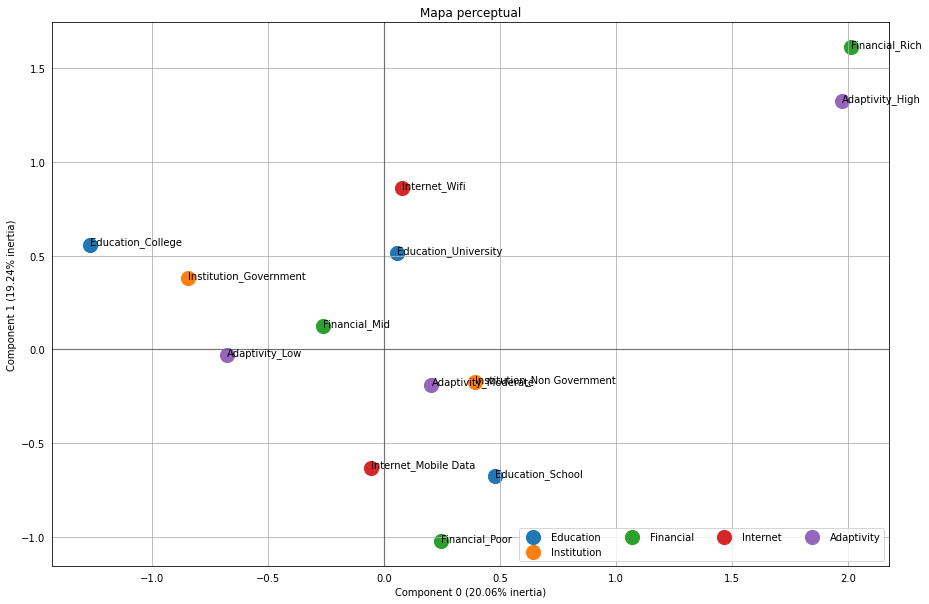

In [50]:
if len(data.columns) >2:
  ax = mca.plot_coordinates(X=data,ax=None,figsize=(15, 10),
                            show_row_points=False,show_row_labels=False,
                            show_column_points=True,column_points_size=200,
                            show_column_labels=True,legend_n_cols=4)
  ax.set_title('Mapa perceptual')
  print('Eigen Values:',mca.eigenvalues_,
      '\n Inércia total:', mca.total_inertia_,
      '\n Inércia explicada:', mca.explained_inertia_)
else:
  ax = ca.plot_coordinates(X=data,ax=None,figsize=(15, 10),
                           show_row_points=False,show_row_labels=False,
                           show_column_points=True,column_points_size=200,
                           show_column_labels=True,legend_n_cols=4)
  ax.set_title('Mapa perceptual')
  print('Eigen Values:',ca.eigenvalues_,
      '\n Inércia total:', ca.total_inertia_,
      '\n Inércia explicada:', ca.explained_inertia_)